In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from IPython.display import Markdown


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("../data/bank/bank-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.shape

(45211, 17)

# Data Preprocessing

In [6]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
df.isin([-np.inf,np.inf]).any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [8]:
df[df == "unknown"] = np.nan

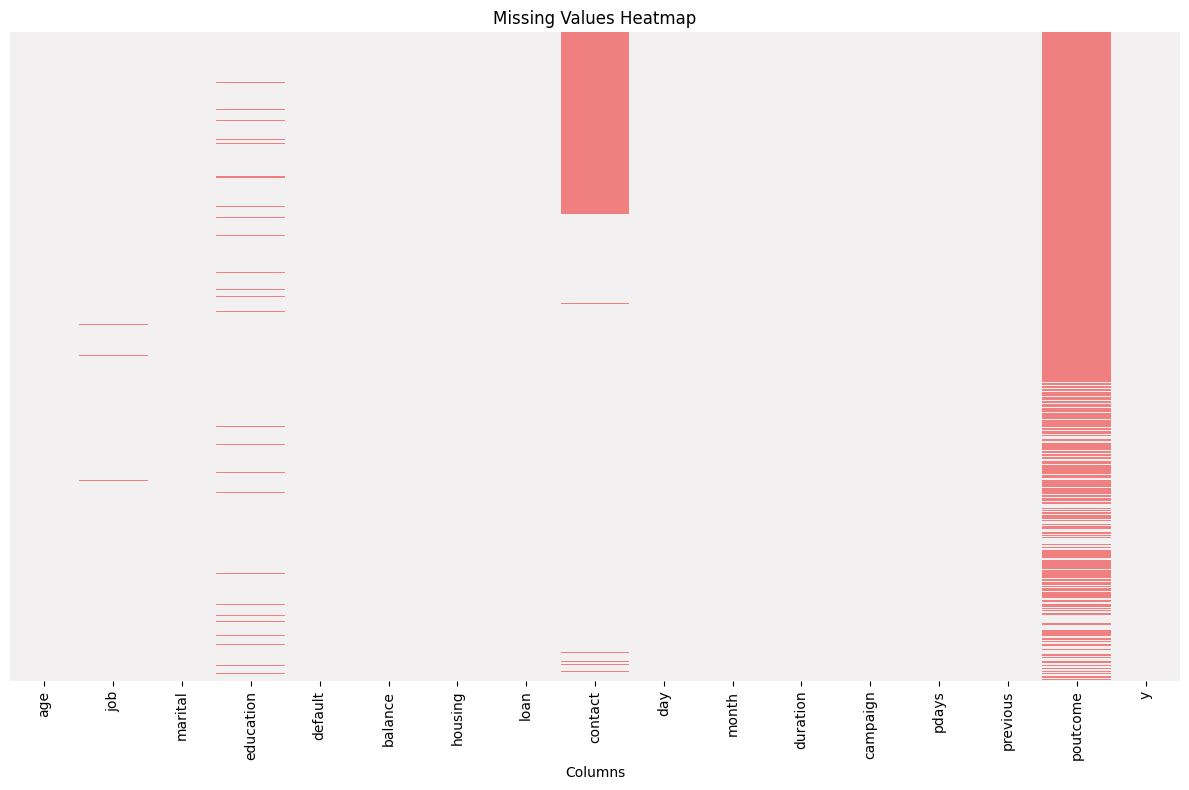

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(), 
    cbar=False, 
    cmap=sns.light_palette("lightcoral", as_cmap=True),  # Pastel/light color
    yticklabels=False,
)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [10]:
poutcome_nas = math.floor(df['poutcome'].isna().mean() * 100)
Markdown(f"### Removing `poutcome` column as there are {poutcome_nas}% of rows that are unknown!")

### Removing `poutcome` column as there are 81% of rows that are unknown!

In [11]:
df = df.drop(columns='poutcome',axis=0)

In [12]:
df.isna().any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

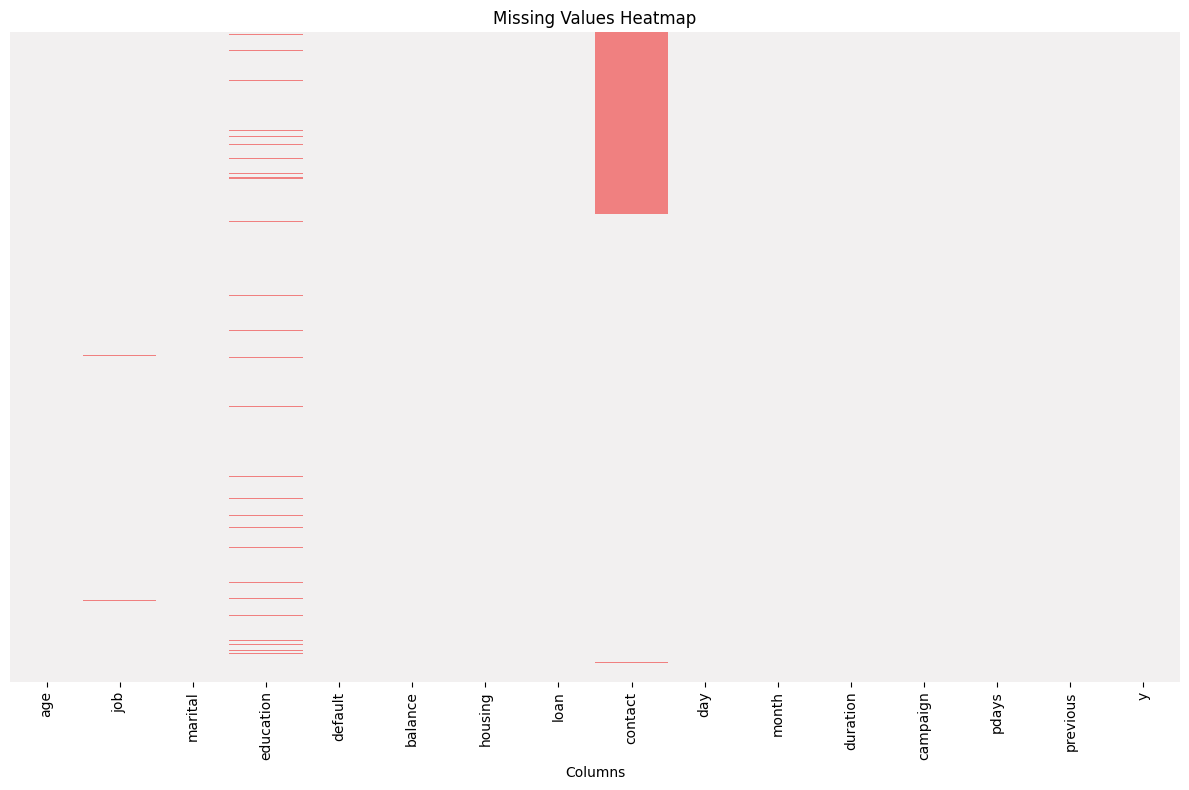

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(), 
    cbar=False, 
    cmap=sns.light_palette("lightcoral", as_cmap=True),  # Pastel/light color
    yticklabels=False,
)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [15]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols].astype(str))

### As there are less or insignificant number of missing values, we can proceed using MICE imputation

In [16]:
# Impute all columns
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Decode categorical columns back
df_imputed[categorical_cols] = encoder.inverse_transform(df_imputed[categorical_cols])

In [17]:
df_imputed.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

In [18]:
df.to_csv("../data/processed/bank-dataset-processed.csv")